### Realizado por: 
1. John Anderson Acosta 202212004
### QUIZ SEMANA 4:

1. Copie el código en chatGPT o su inteligencia artificial generativa de confianza, y pidale que le explique paso a paso el código. Mencione *3* aprendizajes que haya tenido con la respuesta de su inteligencia artificial generativa de confianza.

Inicialmente, menciono que, respecto al anterior modelo de 1 a 30 neuronas en la unica capa oculta que poseeia, esta contiene 2 capas ocultas cada una de 100 neuronas. Es decir, se tiene 100 pesos y 100 bias/sesgos para la primera capa 1->100 y, posteriormente, 10000 pesos y 100 sesgos para la segunda capa oculta 100->100. Por lo tanto, aunque la alta capacidad permite que la red se adapte a patrones complejos, puede que se memorice los datos ajustando los pesos y al bias al entrenamiento. Esto es, que al poner muchas neuronas y muchos parametros a ser ajustados el modelo se vuelve dependiente de los datos, y es necesario que, para generalizarlo o ser usados con otros datos de entrada, se usen el dropout o datos de entrada diferentes para evitar el sobreajuste/overfitting. Asimismo, señalo que visualizar los datos y observar que, al ser un problema de clasificación binaria, es adecuado abordarlo por medio de la regresión logística con una función de pérdida de Binary Cross-corelation. PERO(algo que contrasta con la respuesta del anterior quiz) sugiere que, una alternativa más estable numéricamente es BCEWithLogitsLoss sin una capa Sigmoid, ya que, la sigmoide se encuentra en la funcion de loss para evitar log/exp extremos. Por último, destaca que es adecuado para un problema con dengue mostrar los falsos negativos en la matriz de confusión, debido a que, un falso negativo puede ser más costoso que una falsa alarma(Falso positivo). De este modo, La lección es ajustar el umbral de 0,5 a la cobertura, teniendo en cuenta que, la precisión por sí sola puede ocultar importantes compensaciones segun el problema.

2. Escriba y defina como funciona la función de activación *ReLU* y su diferencia con *Sigmoid*. Exponga por que esta función de activación tiene beneficios en las capas densas.

En primer lugar, la función ReLu es una función a trozos: $f(\text{ReLU}(x)) = \max(0, x)$ $
f(x) = \begin{cases} 0 & \text{si } x < 0 \\x & \text{si } x \geq 0\end{cases}$ Donde la función va de 0, como valor minimo, en el caso de que el valor de entrada es negativo, y regresa el valor de la sumatoria de la neurona, si este es un valor positivo. Por este motivo, la función solo conserva los valores positivos de aquellas neuronas con salidas de sumatorias positivas [1]. Ahora bien, se diferencia de la función sigmoide, a causa de que, la sigmoide toma valores de $[0:1]$ y es comun emplearla en problemas de clasificación binaria [2]. Adicionalmente, la sigmoide en los valores grandes de su salida posee una derivada muy pequeña y cercana a 0. Por lo tanto, en la retroporpagación las derivadas parciales no poseen un efecto significante o sobresaliente en minimizar el error/loss de los pesos y bias/sesgo de las neuronas. 

En contraste, ReLU solo enfrenta un desvanecimiento del gradiente, o un gradiente muy inferior, cuando la sumatoria de la neurona en la entrada es inferior a 0. De lo contrario, la derivada parcial es 1 y cada iteración se ajusta al learning rate que se propone en el modelo, no obstante, este desvanecimiento puede eliminarse utilizando GeLu o Leaky ReLu. Asimismo, en redes muy profundas ReLu es usada en las capas ocultas, en cambio, la sigmoide no es utilizada frecuentemente en cada capa sino solo como capa de salida, ya que dara una probabilidad de 0 a 1 para clasificar el dato de entrada [3]. Por otro lado, son mucho más sencillas en complejidad computacional, temporal y espacial. Principalmente, porque el feedforward y la retropropagación al usar ReLu son instrucción matematicamente simples. En comparación, la activación sigmoide requiere calcular un exponente, y con redes grandes con muchas neuronas, puede reducir significativamente tanto los tiempos de entrenamiento como los de evaluación. Finalmente, como se menciono previamente, la funcion de activación sigmoidea, el gradiente de la sigmoidea suele ser una fracción entre 0 y 1. Si hay muchas capas, estas se multiplican y pueden dar un gradiente global exponencialmente pequeño, lo que dará lugar a una convergencia lenta. Por el contrario, con la activación ReLu, el gradiente de la ReLu es 0 o 1, depende del learning rate, y su convergencia es mas rapida [3].
	return input
else:
	return 0
    
[1] “Python API.” https://docs.pytorch.org/docs/stable/generated/torch.nn.ReLU.html

[2] W&B, “Weights & biases,” W&B, Noviembre. 31, 2022. https://wandb.ai/ayush-thakur/dl-question-bank/reports/ReLU-vs-Sigmoid-Function-in-Deep-Neural-Networks--VmlldzoyMDk0MzI

[3] “What are the advantages of ReLU over sigmoid function in deep neural networks?,” Cross Validated, Apr. 11, 2018. https://stats.stackexchange.com/questions/126238/what-are-the-advantages-of-relu-over-sigmoid-function-in-deep-neural-networks/298793#298793



3. Usando las dos capas profundas, proponga 3 arquitecturas nuevas de redes cambiando el número de neuronas de cada capa. Busque mejorar las métricas que tenemos, principalmente *Accuracy* y *F1-score*.


In [1]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

# Leer el archivo Excel
df = pd.read_excel('datosDengueTangamandapio.xlsx')

x_real = df['Lluvias'].values.reshape(-1,1)
y_real = df['Pico de casos'].values.reshape(-1,1)
t = df['t']

X_escalado=(x_real - np.mean(x_real)) / np.std(x_real)
Y_escalado=y_real

X_tensor = torch.tensor(X_escalado, dtype=torch.float32)
y_tensor = torch.tensor(Y_escalado, dtype=torch.float32)



Epoch 0: Loss 0.7296
Epoch 100: Loss 0.2385
Epoch 200: Loss 0.2260
Epoch 300: Loss 0.2130
Epoch 400: Loss 0.1944
Epoch 500: Loss 0.1801
Epoch 600: Loss 0.1755
Epoch 700: Loss 0.1646
Epoch 800: Loss 0.1692
Epoch 900: Loss 0.1556
Epoch 1000: Loss 0.1513
Epoch 1100: Loss 0.1436
Epoch 1200: Loss 0.1371
Epoch 1300: Loss 0.1306
Epoch 1400: Loss 0.1291
Epoch 1500: Loss 0.1720
Epoch 1600: Loss 0.1200
Epoch 1700: Loss 0.1155
Epoch 1800: Loss 0.1165
Epoch 1900: Loss 0.1109
Epoch 2000: Loss 0.1108
Epoch 2100: Loss 0.1102
Epoch 2200: Loss 0.1111
Epoch 2300: Loss 0.0960
Epoch 2400: Loss 0.1079
Epoch 2500: Loss 0.0959
Epoch 2600: Loss 0.0943
Epoch 2700: Loss 0.0906
Epoch 2800: Loss 0.0925
Epoch 2900: Loss 0.0962
Epoch 3000: Loss 0.0920
Epoch 3100: Loss 0.0935
Epoch 3200: Loss 0.0846
Epoch 3300: Loss 0.0822
Epoch 3400: Loss 0.0810
Epoch 3500: Loss 0.0825
Epoch 3600: Loss 0.0760
Epoch 3700: Loss 0.0750
Epoch 3800: Loss 0.0814
Epoch 3900: Loss 0.0705
Epoch 4000: Loss 0.0709
Epoch 4100: Loss 0.1164
Epoc

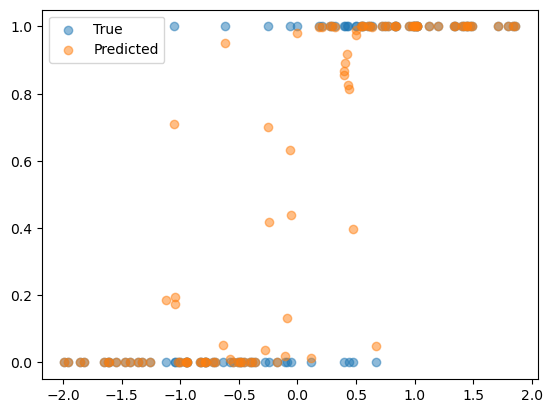

Matriz de Confusión:
TP: 50 | FP: 2
FN: 0 | TN: 48

📊 Evaluación:
Accuracy  : 0.9800
Precision : 0.9615
Recall    : 1.0000
F1-score  : 0.9804


In [2]:
#Previamente de usar este codigo se tiene que ejectutar las celdas en las que se reescala los datos y se generan tensores
import torch
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import random

#La semilla se usa para reproducir el experimento si se vuelve a correr la celda
seed = 10
torch.manual_seed(seed)         
np.random.seed(seed)           
random.seed(seed)    


#Definir red neuronal
# Modelo con dos capas ocultas
model = nn.Sequential(
    nn.Linear(1, 170), #Capa 1
    nn.ReLU(), #Activación capa 1
    nn.Linear(170, 170), #Capa 2
    nn.ReLU(), #Activación capa 2
    nn.Linear(170, 1), #Capa 3
    nn.Sigmoid() #Activación capa 3
)

loss_fn = nn.BCELoss() #Funcion de perdida
optimizer = optim.Adam(model.parameters(), lr=0.01) #Optimizador avanzado: Permite tener momentum para saber donde hay caidas mas abruptas en la superficie de la función de perdida y ajustar lr segun esto.

# Entrenamiento en las épocas
for epoch in range(5000): 
    y_pred = model(X_tensor) #Calculamos la salida del modelo segun nuestra variable de entrada
    loss = loss_fn(y_pred, y_tensor) #Calculamos la función de perdida según la salida del modelo y la variable medida.

    optimizer.zero_grad() #Se limpian los pasos del optimizador para calcularlos de cero y que no tengan información de pasos previos
    loss.backward() #Calculamos todos los gradientes con retropropagación 
    optimizer.step() #Actualizamos los pasos de nuestros parámetros

    if epoch % 100 == 0: #Imprimimos cada 100 épocas.
        print(f"Epoch {epoch}: Loss {loss.item():.4f}")
        
with torch.no_grad():
    y_pred = model(X_tensor)
pred_classes = (y_pred >= 0.5).float()

plt.scatter(X_escalado, Y_escalado, label='True', alpha=0.5)
plt.scatter(X_escalado, y_pred, label='Predicted', alpha=0.5)
plt.legend()
plt.show()

import torch
from sklearn.metrics import confusion_matrix

# 1. Predicción con el modelo entrenado (no requiere gradientes)
with torch.no_grad():
    y_pred = model(X_tensor)
    y_pred_class = (y_pred >= 0.5).int()  # Umbral de 0.5 para clasificación binaria

# 2. Convertir tensores a NumPy arrays para sklearn
y_true = y_tensor.numpy().astype(int).flatten()
y_pred_class_np = y_pred_class.numpy().flatten()

# 3. Calcular la matriz de confusión
cm = confusion_matrix(y_true, y_pred_class_np)

# 4. Extraer TP, FP, FN, TN
tn, fp, fn, tp = cm.ravel()

print("Matriz de Confusión:")
print(f"TP: {tp} | FP: {fp}")
print(f"FN: {fn} | TN: {tn}")

# 5. Calcular métricas
accuracy = (tp + tn) / (tp + tn + fp + fn)
precision = tp / (tp + fp) if (tp + fp) > 0 else 0
recall = tp / (tp + fn) if (tp + fn) > 0 else 0
f1 = 2 * precision * recall / (precision + recall) if (precision + recall) > 0 else 0

print(f"\n📊 Evaluación:")
print(f"Accuracy  : {accuracy:.4f}")
print(f"Precision : {precision:.4f}")
print(f"Recall    : {recall:.4f}")
print(f"F1-score  : {f1:.4f}")

Epoch 0: Loss 0.6544
Epoch 100: Loss 0.2503
Epoch 200: Loss 0.2354
Epoch 300: Loss 0.2258
Epoch 400: Loss 0.2111
Epoch 500: Loss 0.2011
Epoch 600: Loss 0.1885
Epoch 700: Loss 0.1819
Epoch 800: Loss 0.1705
Epoch 900: Loss 0.1717
Epoch 1000: Loss 0.1612
Epoch 1100: Loss 0.1523
Epoch 1200: Loss 0.1455
Epoch 1300: Loss 0.1426
Epoch 1400: Loss 0.1366
Epoch 1500: Loss 0.1285
Epoch 1600: Loss 0.1234
Epoch 1700: Loss 0.1213
Epoch 1800: Loss 0.1151
Epoch 1900: Loss 0.1113
Epoch 2000: Loss 0.1075
Epoch 2100: Loss 0.1083
Epoch 2200: Loss 0.1070
Epoch 2300: Loss 0.1008
Epoch 2400: Loss 0.0956
Epoch 2500: Loss 0.0967
Epoch 2600: Loss 0.1584
Epoch 2700: Loss 0.0908
Epoch 2800: Loss 0.0882
Epoch 2900: Loss 0.0869
Epoch 3000: Loss 0.0824
Epoch 3100: Loss 0.0799
Epoch 3200: Loss 0.1023
Epoch 3300: Loss 0.0796
Epoch 3400: Loss 0.0778
Epoch 3500: Loss 0.0782
Epoch 3600: Loss 0.0760
Epoch 3700: Loss 0.0707
Epoch 3800: Loss 0.0692
Epoch 3900: Loss 0.0691
Epoch 4000: Loss 0.0668
Epoch 4100: Loss 0.0687
Epoc

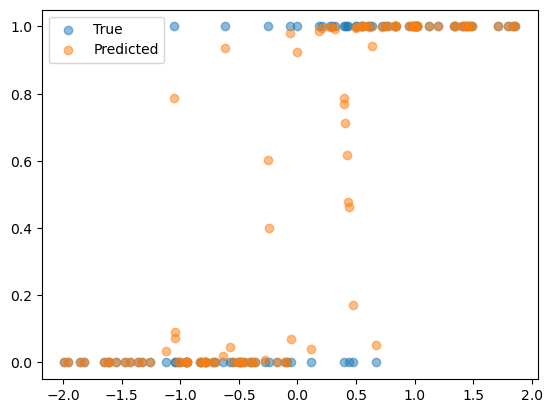

Matriz de Confusión:
TP: 49 | FP: 1
FN: 1 | TN: 49

📊 Evaluación:
Accuracy  : 0.9800
Precision : 0.9800
Recall    : 0.9800
F1-score  : 0.9800


In [3]:
#Previamente de usar este codigo se tiene que ejectutar las celdas en las que se reescala los datos y se generan tensores
import torch
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

#La semilla se usa para reproducir el experimento si se vuelve a correr la celda
seed = 10
torch.manual_seed(seed)         
np.random.seed(seed)           
random.seed(seed)   

#Definir red neuronal
# Modelo con dos capas ocultas
model = nn.Sequential(
    nn.Linear(1, 135), #Capa 1
    nn.ReLU(), #Activación capa 1
    nn.Linear(135, 41), #Capa 2
    nn.ReLU(), #Activación capa 2
    nn.Linear(41, 1), #Capa 3
    nn.Sigmoid() #Activación capa 3
)

loss_fn = nn.BCELoss() #Funcion de perdida
optimizer = optim.Adam(model.parameters(), lr=0.01) #Optimizador avanzado: Permite tener momentum para saber donde hay caidas mas abruptas en la superficie de la función de perdida y ajustar lr segun esto.

# Entrenamiento en las épocas
for epoch in range(5000): 
    y_pred = model(X_tensor) #Calculamos la salida del modelo segun nuestra variable de entrada
    loss = loss_fn(y_pred, y_tensor) #Calculamos la función de perdida según la salida del modelo y la variable medida.

    optimizer.zero_grad() #Se limpian los pasos del optimizador para calcularlos de cero y que no tengan información de pasos previos
    loss.backward() #Calculamos todos los gradientes con retropropagación 
    optimizer.step() #Actualizamos los pasos de nuestros parámetros

    if epoch % 100 == 0: #Imprimimos cada 100 épocas.
        print(f"Epoch {epoch}: Loss {loss.item():.4f}")
        
with torch.no_grad():
    y_pred = model(X_tensor)
pred_classes = (y_pred >= 0.5).float()

plt.scatter(X_escalado, Y_escalado, label='True', alpha=0.5)
plt.scatter(X_escalado, y_pred, label='Predicted', alpha=0.5)
plt.legend()
plt.show()

import torch
from sklearn.metrics import confusion_matrix

# 1. Predicción con el modelo entrenado (no requiere gradientes)
with torch.no_grad():
    y_pred = model(X_tensor)
    y_pred_class = (y_pred >= 0.5).int()  # Umbral de 0.5 para clasificación binaria

# 2. Convertir tensores a NumPy arrays para sklearn
y_true = y_tensor.numpy().astype(int).flatten()
y_pred_class_np = y_pred_class.numpy().flatten()

# 3. Calcular la matriz de confusión
cm = confusion_matrix(y_true, y_pred_class_np)

# 4. Extraer TP, FP, FN, TN
tn, fp, fn, tp = cm.ravel()

print("Matriz de Confusión:")
print(f"TP: {tp} | FP: {fp}")
print(f"FN: {fn} | TN: {tn}")

# 5. Calcular métricas
accuracy = (tp + tn) / (tp + tn + fp + fn)
precision = tp / (tp + fp) if (tp + fp) > 0 else 0
recall = tp / (tp + fn) if (tp + fn) > 0 else 0
f1 = 2 * precision * recall / (precision + recall) if (precision + recall) > 0 else 0

print(f"\n📊 Evaluación:")
print(f"Accuracy  : {accuracy:.4f}")
print(f"Precision : {precision:.4f}")
print(f"Recall    : {recall:.4f}")
print(f"F1-score  : {f1:.4f}")

Epoch 0: Loss 0.6399
Epoch 100: Loss 0.2471
Epoch 200: Loss 0.2330
Epoch 300: Loss 0.2208
Epoch 400: Loss 0.2095
Epoch 500: Loss 0.1935
Epoch 600: Loss 0.1774
Epoch 700: Loss 0.1712
Epoch 800: Loss 0.1617
Epoch 900: Loss 0.1557
Epoch 1000: Loss 0.1523
Epoch 1100: Loss 0.1516
Epoch 1200: Loss 0.1482
Epoch 1300: Loss 0.1466
Epoch 1400: Loss 0.1479
Epoch 1500: Loss 0.1441
Epoch 1600: Loss 0.1420
Epoch 1700: Loss 0.1408
Epoch 1800: Loss 0.1393
Epoch 1900: Loss 0.1379
Epoch 2000: Loss 0.1366
Epoch 2100: Loss 0.1345
Epoch 2200: Loss 0.1328
Epoch 2300: Loss 0.1320
Epoch 2400: Loss 0.1514
Epoch 2500: Loss 0.1411
Epoch 2600: Loss 0.1371
Epoch 2700: Loss 0.1282
Epoch 2800: Loss 0.1191
Epoch 2900: Loss 0.1114
Epoch 3000: Loss 0.1057
Epoch 3100: Loss 0.1007
Epoch 3200: Loss 0.1029
Epoch 3300: Loss 0.0969
Epoch 3400: Loss 0.0936
Epoch 3500: Loss 0.0906
Epoch 3600: Loss 0.0874
Epoch 3700: Loss 0.0843
Epoch 3800: Loss 0.0835
Epoch 3900: Loss 0.0792
Epoch 4000: Loss 0.0839
Epoch 4100: Loss 0.0771
Epoc

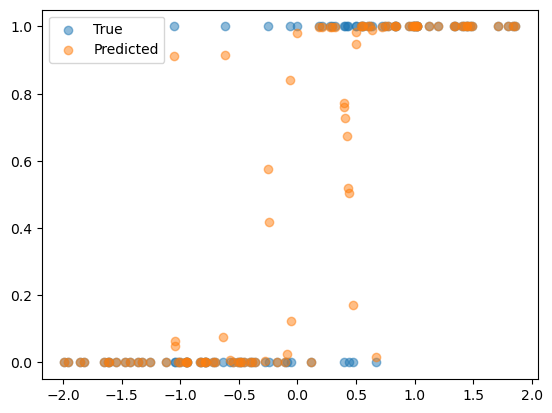

Matriz de Confusión:
TP: 50 | FP: 2
FN: 0 | TN: 48

📊 Evaluación:
Accuracy  : 0.9800
Precision : 0.9615
Recall    : 1.0000
F1-score  : 0.9804


In [4]:
#Previamente de usar este codigo se tiene que ejectutar las celdas en las que se reescala los datos y se generan tensores
import torch
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

#La semilla se usa para reproducir el experimento si se vuelve a correr la celda
seed = 10
torch.manual_seed(seed)         
np.random.seed(seed)           
random.seed(seed)   

#Definir red neuronal
# Modelo con dos capas ocultas
model = nn.Sequential(
    nn.Linear(1, 130), #Capa 1
    nn.ReLU(), #Activación capa 1
    nn.Linear(130, 55), #Capa 2
    nn.ReLU(), #Activación capa 2
    nn.Linear(55, 1), #Capa 3
    nn.Sigmoid() #Activación capa 3
)

loss_fn = nn.BCELoss() #Funcion de perdida
optimizer = optim.Adam(model.parameters(), lr=0.01) #Optimizador avanzado: Permite tener momentum para saber donde hay caidas mas abruptas en la superficie de la función de perdida y ajustar lr segun esto.

# Entrenamiento en las épocas
for epoch in range(5000): 
    y_pred = model(X_tensor) #Calculamos la salida del modelo segun nuestra variable de entrada
    loss = loss_fn(y_pred, y_tensor) #Calculamos la función de perdida según la salida del modelo y la variable medida.

    optimizer.zero_grad() #Se limpian los pasos del optimizador para calcularlos de cero y que no tengan información de pasos previos
    loss.backward() #Calculamos todos los gradientes con retropropagación 
    optimizer.step() #Actualizamos los pasos de nuestros parámetros

    if epoch % 100 == 0: #Imprimimos cada 100 épocas.
        print(f"Epoch {epoch}: Loss {loss.item():.4f}")
        
with torch.no_grad():
    y_pred = model(X_tensor)
pred_classes = (y_pred >= 0.5).float()

plt.scatter(X_escalado, Y_escalado, label='True', alpha=0.5)
plt.scatter(X_escalado, y_pred, label='Predicted', alpha=0.5)
plt.legend()
plt.show()

import torch
from sklearn.metrics import confusion_matrix

# 1. Predicción con el modelo entrenado (no requiere gradientes)
with torch.no_grad():
    y_pred = model(X_tensor)
    y_pred_class = (y_pred >= 0.5).int()  # Umbral de 0.5 para clasificación binaria

# 2. Convertir tensores a NumPy arrays para sklearn
y_true = y_tensor.numpy().astype(int).flatten()
y_pred_class_np = y_pred_class.numpy().flatten()

# 3. Calcular la matriz de confusión
cm = confusion_matrix(y_true, y_pred_class_np)

# 4. Extraer TP, FP, FN, TN
tn, fp, fn, tp = cm.ravel()

print("Matriz de Confusión:")
print(f"TP: {tp} | FP: {fp}")
print(f"FN: {fn} | TN: {tn}")

# 5. Calcular métricas
accuracy = (tp + tn) / (tp + tn + fp + fn)
precision = tp / (tp + fp) if (tp + fp) > 0 else 0
recall = tp / (tp + fn) if (tp + fn) > 0 else 0
f1 = 2 * precision * recall / (precision + recall) if (precision + recall) > 0 else 0

print(f"\n📊 Evaluación:")
print(f"Accuracy  : {accuracy:.4f}")
print(f"Precision : {precision:.4f}")
print(f"Recall    : {recall:.4f}")
print(f"F1-score  : {f1:.4f}")

Tras el experimento pude observar que el resultado puede ser muy arbitrario, habia valores en el que el loss era bajo, como en 166, 166, pero sus resultados parecen indicar que hizo un sobreajuste y tuve una F1-medida de 0.9104. Asimismo habia resultados como 130 y 55 que presento mejores resultados, con una F1-score de 0.9804, al igual que, a partir de lo que vi y experimente los resultados que en la primera capa poseian valores de 100 a 200 y en la segunda capa de 20 a 70, presentaban mejores metricas que aquellas que repetian el mismo numero de neuronas. Adicionalmente, los valores que eran muy altos, generaban a que el loss subiera de [0.09-0.06] a 2.0 o 6.0. Por ultimo, cambiar el numero de epocas y learning rate no cambiaron el resultado, de hecho considero que los valores que se dieron en el laboratorio eran consistentes y generaban buenos resultados. 